# 충남과학고등학교 데이터분석 특강 (3H / 6H)
## 예제로 배우는 데이터 분석
### 초급: 3H, 중급: 6H (초중급 3H 동일)

## Case 4: 기온 및 강수량 데이터 분석
### Question: 대한민국 기온 및 강수량 분석
##### [기상자료개발포털](https://data.kma.go.kr/climate/RankState/selectRankStatisticsDivisionList.do?pgmNo=179)

### Step 1. Question - 충남 3년 기온 데이터 분석

#### 도구 불러오기

In [1]:
import csv
import statistics

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### 2019. 01. 01. ~ 2021. 12. 31. 일일 기온 데이터

In [2]:
df1 = pd.read_csv('datasets/temperature/temperature.csv')
df1

,일시,평균기온
0,2021-12-31,-4.9
1,2021-12-30,-1.2
2,2021-12-29,2.4
3,2021-12-28,-0.7
4,2021-12-27,-4.9
...,...,...
1091,2019-01-05,-2.0
1092,2019-01-04,-2.9
1093,2019-01-03,-4.1
1094,2019-01-02,-4.5


#### 일일 기온 그래프 시각화

In [10]:
xlab = df1['일시']
xlab

0       2021-12-31
1       2021-12-30
2       2021-12-29
3       2021-12-28
4       2021-12-27
           ...    
1091    2019-01-05
1092    2019-01-04
1093    2019-01-03
1094    2019-01-02
1095    2019-01-01
Name: 일시, Length: 1096, dtype: object

In [11]:
y = df1['평균기온']
y

0      -4.9
1      -1.2
2       2.4
3      -0.7
4      -4.9
       ... 
1091   -2.0
1092   -2.9
1093   -4.1
1094   -4.5
1095   -2.8
Name: 평균기온, Length: 1096, dtype: float64

In [12]:
xlab = xlab[::-1]
xlab

1095    2019-01-01
1094    2019-01-02
1093    2019-01-03
1092    2019-01-04
1091    2019-01-05
           ...    
4       2021-12-27
3       2021-12-28
2       2021-12-29
1       2021-12-30
0       2021-12-31
Name: 일시, Length: 1096, dtype: object

In [13]:
y = y[::-1]
y

1095   -2.8
1094   -4.5
1093   -4.1
1092   -2.9
1091   -2.0
       ... 
4      -4.9
3      -0.7
2       2.4
1      -1.2
0      -4.9
Name: 평균기온, Length: 1096, dtype: float64

In [31]:
x = range(len(y))
x

range(0, 1096)

Text(0.5, 1.0, 'Daily Temperature')

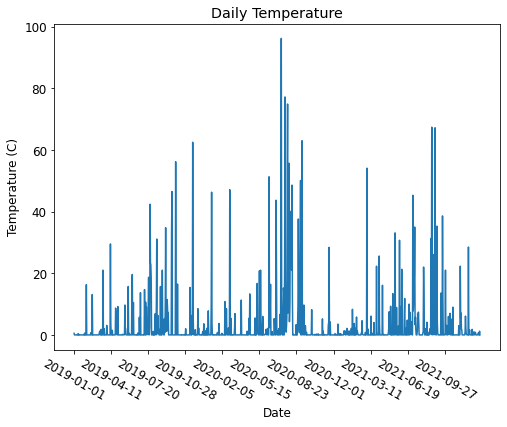

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.plot(x, y)
ax.set_xticks(x[::100], xlab[::100], rotation=-30)
ax.tick_params(axis='both', labelsize='large')
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('Temperature (C)', fontsize='large')
ax.set_title('Daily Temperature', fontsize='x-large')

### Step 2. Question - 충남 3년 강수량 데이터 분석

#### 2019. 01. 01. ~ 2021. 12. 31. 일일 강수량 데이터

In [3]:
df2 = pd.read_csv('datasets/temperature/rainfall.csv')
df2

,일시,평균일강수량
0,2021-12-31,0.0
1,2021-12-30,1.2
2,2021-12-29,0.1
3,2021-12-28,0.0
4,2021-12-27,0.7
...,...,...
1091,2019-01-05,0.0
1092,2019-01-04,0.0
1093,2019-01-03,0.0
1094,2019-01-02,0.0


#### 일일 강수량 그래프 시각화

In [23]:
xlab = df2['일시']
xlab

0       2021-12-31
1       2021-12-30
2       2021-12-29
3       2021-12-28
4       2021-12-27
           ...    
1091    2019-01-05
1092    2019-01-04
1093    2019-01-03
1094    2019-01-02
1095    2019-01-01
Name: 일시, Length: 1096, dtype: object

In [24]:
y = df2['평균일강수량']
y

0       0.0
1       1.2
2       0.1
3       0.0
4       0.7
       ... 
1091    0.0
1092    0.0
1093    0.0
1094    0.0
1095    0.5
Name: 평균일강수량, Length: 1096, dtype: float64

In [25]:
xlab = xlab[::-1]
xlab

1095    2019-01-01
1094    2019-01-02
1093    2019-01-03
1092    2019-01-04
1091    2019-01-05
           ...    
4       2021-12-27
3       2021-12-28
2       2021-12-29
1       2021-12-30
0       2021-12-31
Name: 일시, Length: 1096, dtype: object

In [26]:
y = y[::-1]
y

1095    0.5
1094    0.0
1093    0.0
1092    0.0
1091    0.0
       ... 
4       0.7
3       0.0
2       0.1
1       1.2
0       0.0
Name: 평균일강수량, Length: 1096, dtype: float64

In [32]:
x = range(len(y))
x

range(0, 1096)

Text(0.5, 1.0, 'Daily Precipitation')

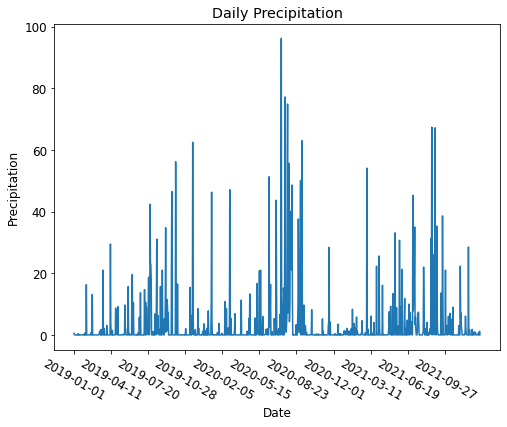

In [33]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.plot(x, y)
ax.set_xticks(x[::100], xlab[::100], rotation=-30)
ax.tick_params(axis='both', labelsize='large')
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('Precipitation (mm)', fontsize='large')
ax.set_title('Daily Precipitation', fontsize='x-large')

In [ ]:
temperature = [26.6, 28.8, 29.3, 29.3, 29.2, 29.5, 28.2, 25.8, 26.9, 29.2]
temperature

#### 시각화 데이터 준비

In [ ]:
x = list(range(0, len(temperature)))
x

In [ ]:
y = temperature
y

In [ ]:
xlab = ['2022-07-01', '2022-07-02', '2022-07-03', '2022-07-04', '2022-07-05', 
        '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-09', '2022-07-10']
xlab

#### 시각화

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.plot(x, y)
ax.set_xticks(x, xlab, rotation=-30)
ax.tick_params(axis='both', labelsize='large')
ax.set_xlabel('Date', fontsize='large')
ax.set_ylabel('Temperature', fontsize='large')
ax.set_title('Daily Temperature', fontsize='x-large')

### Step 2. Question - 공주시 고등학교 학생 수 비교 시각화

#### 도구 불러오기

In [ ]:
import statistics

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### 공주시 고등학교 학생 수

In [ ]:
student = {'Year 1': [167, 148, 156, 64, 86, 145, 122, 69, 77, 130],
           'Year 2': [167, 142, 163, 62, 66, 129, 114, 77, 72, 127],
           'Year 3': [166, 146, 161, 74, 96, 149, 130, 60, 47, 130],
           'Special': [5, 0, 4, 0, 25, 2, 0, 0, 0, 0]}
student

#### 시각화 데이터 준비

In [ ]:
xlab = []
y = []
print('공주시 고등학교 1~3학년 및 특수학급 학생 수 평균')
for key, value in student.items():
    print(f'{key}: {statistics.mean(value)}')
    xlab.append(key)
    y.append(statistics.mean(value))
x = list(range(len(xlab)))
color = ['blue', 'green', 'yellow', 'brown']
print(f'x: {x}')
print(f'xlab: {xlab}')
print(f'color: {color}')
print(f'y: {y}')

#### 시각화

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.bar(x, y, color=color, tick_label=xlab)
ax.tick_params(axis='both', labelsize='large')
ax.set_title('Average number of students per grade level', fontsize='x-large')